In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filtered_df = pd.read_csv(r'../../data/processed/final_panel_data.csv')

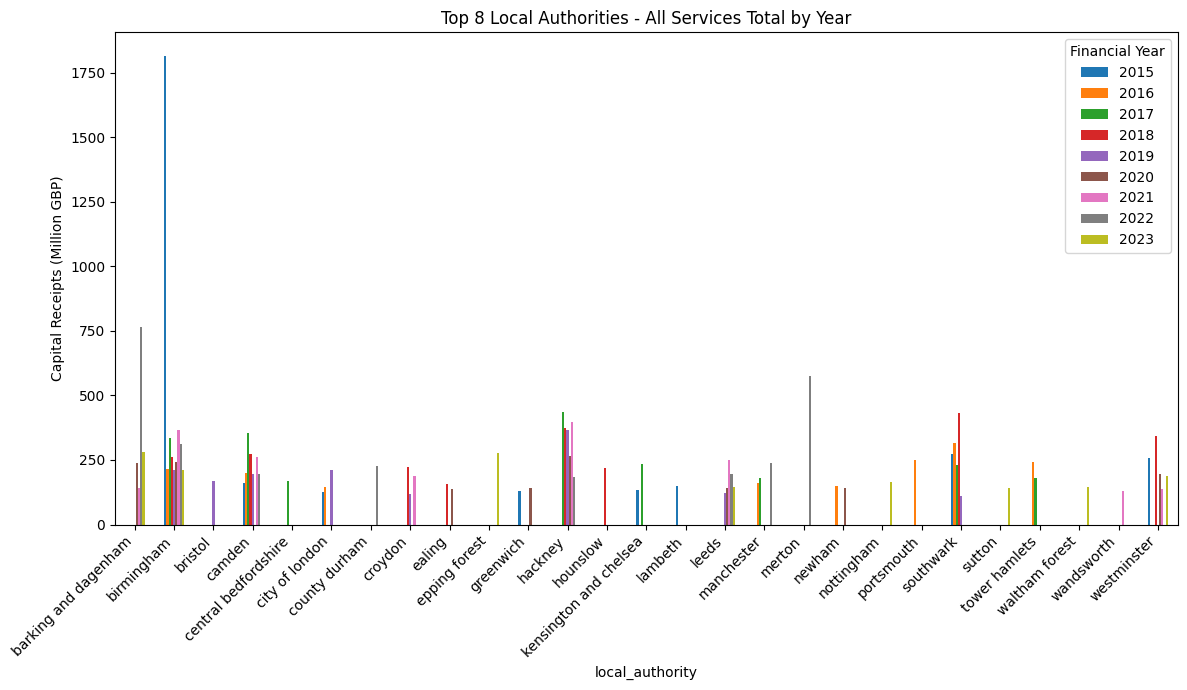

In [14]:
# Group and find top 5 councils per year
top8_per_year = (
    filtered_df.groupby(['financial_year', 'local_authority'])['value']
    .sum()
    .reset_index()
    .sort_values(['financial_year', 'value'], ascending=[True, False])
    .groupby('financial_year')
    .head(8)
)

# Pivot the table for plotting
pivot_top8 = top8_per_year.pivot(index='local_authority', columns='financial_year', values='value')

# Plotting
pivot_top8.plot(kind='bar', figsize=(12, 7))

plt.ylabel('Capital Receipts (Million GBP)')
plt.title('Top 8 Local Authorities - All Services Total by Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Financial Year')
plt.tight_layout()
plt.show()



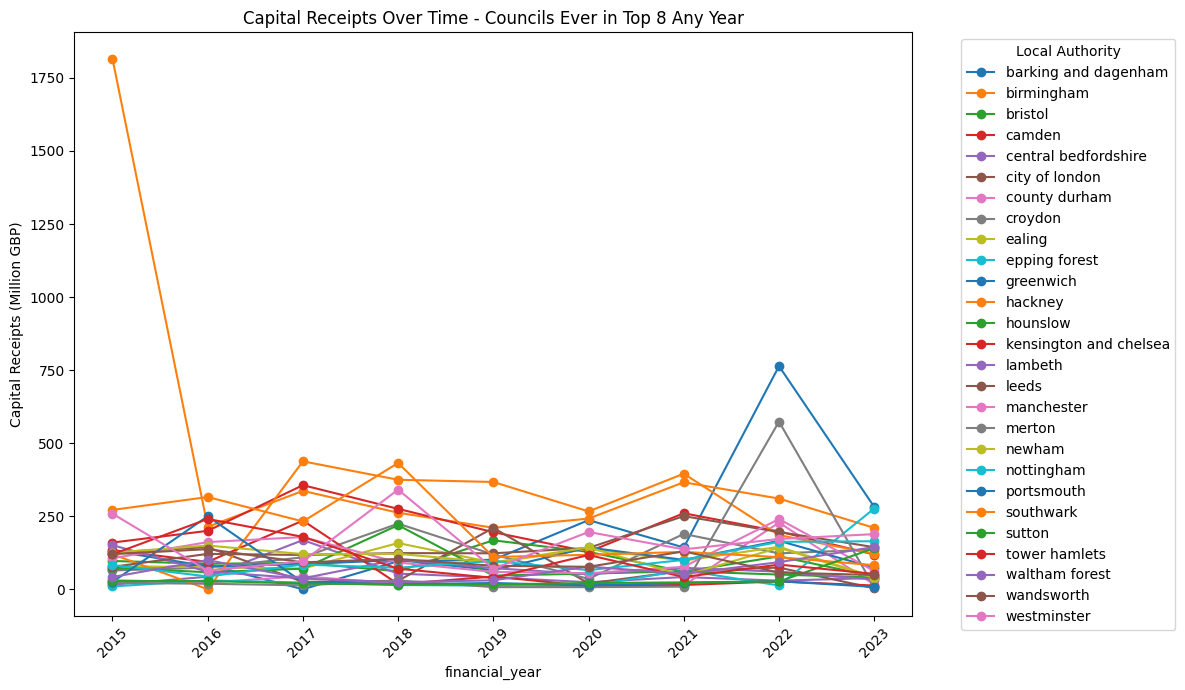

In [11]:
# 1. Get top 8 councils for each year
top8_each_year = (
    filtered_df.groupby(['financial_year', 'local_authority'])['value']
    .sum()
    .reset_index()
    .sort_values(['financial_year', 'value'], ascending=[True, False])
    .groupby('financial_year')
    .head(8)
)

# 2. Get unique councils that were ever top 8
top_councils = top8_each_year['local_authority'].unique()

# 3. Filter original data for these councils
df_top_councils = filtered_df[filtered_df['local_authority'].isin(top_councils)]

# 4. Pivot for line plot
pivot_df = (
    df_top_councils.groupby(['financial_year', 'local_authority'])['value']
    .sum()
    .reset_index()
    .pivot(index='financial_year', columns='local_authority', values='value')
)

# 5. Plot line graph
pivot_df.plot(figsize=(12, 7), marker='o')

plt.ylabel('Capital Receipts (Million GBP)')
plt.title('Capital Receipts Over Time - Councils Ever in Top 8 Any Year')
plt.xticks(rotation=45)
plt.legend(title='Local Authority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
